<a href="https://colab.research.google.com/github/Shrey327/Machine_Learning/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("Fraud.csv")
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [20]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,True


In [4]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [5]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [7]:
df = df.dropna()

In [8]:
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [10]:
df = df.astype({col: 'int' for col in df.columns if df[col].dtype == 'bool'})

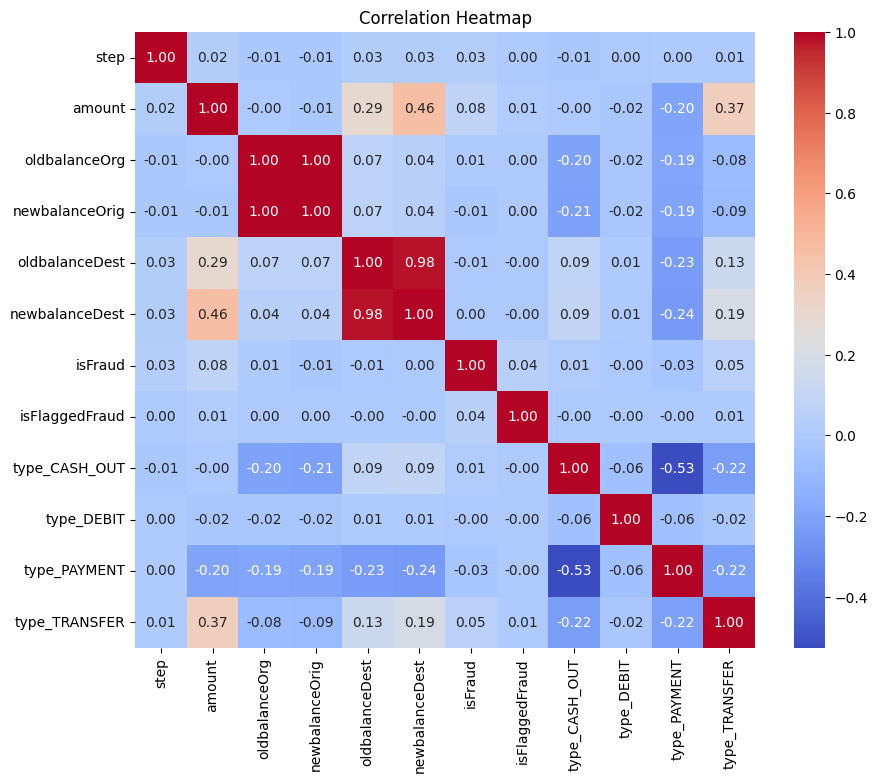

In [18]:
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
df.dtypes

,0
step,int64
amount,float64
oldbalanceOrg,float64
newbalanceOrig,float64
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64
isFlaggedFraud,float64
type_CASH_IN,int64
type_CASH_OUT,int64


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/50
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 2/50
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 3/50
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 4/50
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 5/50
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 6/50
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 7/50
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 8/50
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9995 - loss: 0

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))


39767/39767 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step
[[1270788      93]
 [    491    1152]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.93      0.70      0.80      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.85      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC AUC Score: 0.9971173049358047
